In [16]:
import cv2
import numpy as np 
from scipy.interpolate import interp1d
from pyefd import elliptic_fourier_descriptors
from matplotlib import pyplot as plt


%matplotlib inline

In [17]:
def process_image_and_calculate_dft(image_path, target_length=256):

    # Load image
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    _, thresh = cv2.threshold(blur, 1, 255, cv2.THRESH_BINARY)

    plt.imshow(gray)
    plt.show()

    plt.imshow(thresh)
    plt.show()

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    if not contours:
        raise ValueError("No contours found")
    
    coeffs = []

    for cnt in contours:
        # Find the coefficients of the contours
        coeffs.append(elliptic_fourier_descriptors(np.squeeze(cnt, axis=1), order=10))

    potato_contour = max(contours, key=cv2.contourArea)

    M = cv2.moments(potato_contour)

    if M['m00'] == 0:
        raise ValueError("Invalid contour")
    
    # Calculate the centroid
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    potato_contour = potato_contour.squeeze()

    distances = np.sqrt((potato_contour[:, 0] - cx)**2 + (potato_contour[:, 1] - cy)**2)

    x_old = np.linspace(0, 1, len(distances))
    f = interp1d(x_old, distances, kind='linear')
    x_new = np.linspace(0, 1, target_length)

    distances_interpolated = f(x_new)

    # Normalize the interpolated distances so that the maximum distance is 250
    max_distance = np.max(distances_interpolated)
    distances_normalized = distances_interpolated / max_distance * 250

    dft_result = np.fft.fft(distances_normalized)

    dft_magnitude = np.abs(dft_result)    

    return dft_magnitude

In [18]:
img_path = "/home/mishkat/Downloads/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_2_class/malformed/sd_malformed_12_2_1_108_3.png"

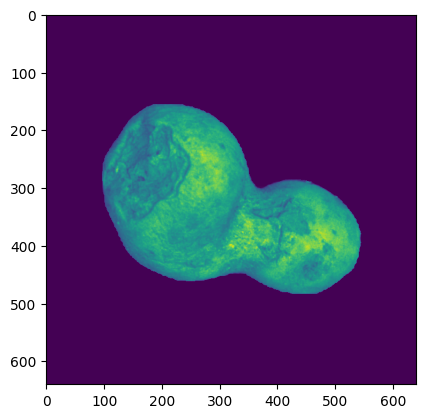

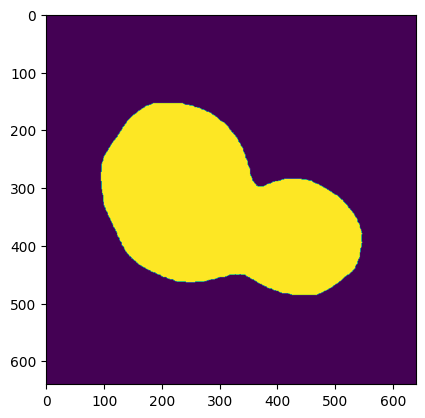

In [19]:
check = process_image_and_calculate_dft(img_path)

In [33]:
# Plotting the DFT and Images
def show_images_and_dft(img_path, check):
    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    plt.figsize = (12, 6)
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.plot(check[:256 // 2])  # Plot only half (symmetrical)
    # plt.plot(check[:256])  
    plt.title('Fourier Magnitude')
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')

    plt.tight_layout()
    plt.show()

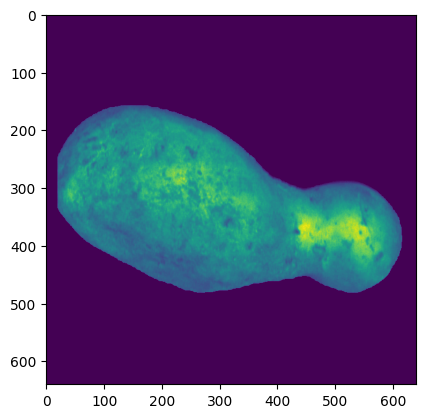

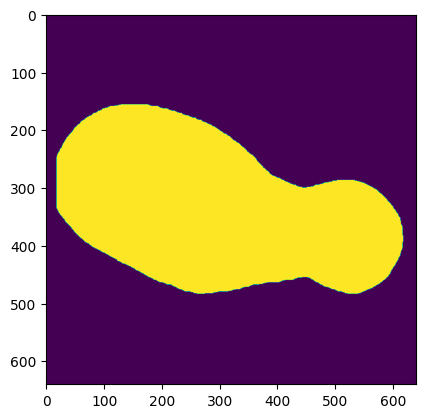

In [34]:
img_path = "/home/mishkat/Downloads/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_2_class/malformed/sd_malformed_12_2_1_114_9.png"
check = process_image_and_calculate_dft(img_path)

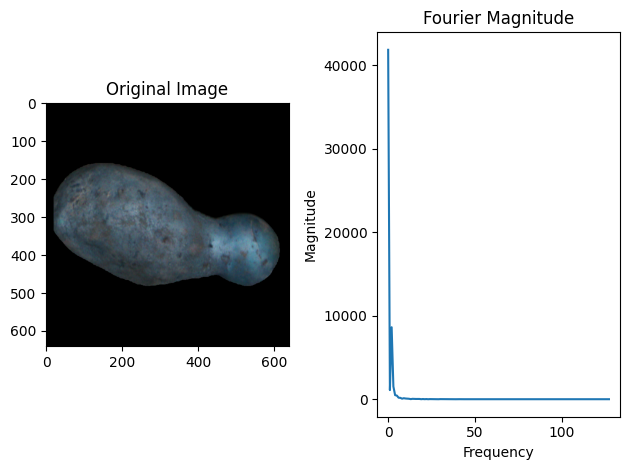

In [35]:
show_images_and_dft(img_path, check)

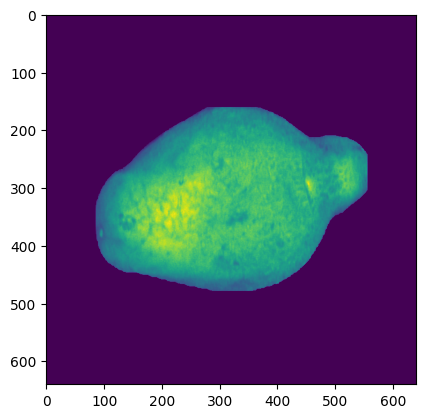

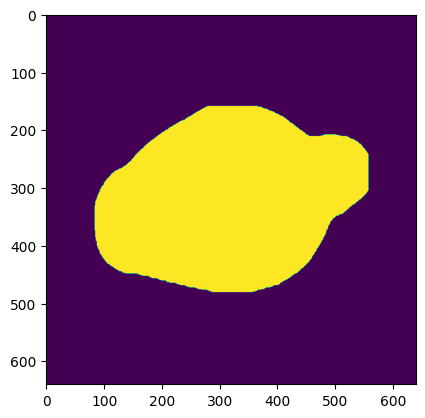

In [36]:
img_path = "/home/mishkat/Downloads/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_2_class/malformed/sd_malformed_12_2_1_110_13.png"

check = process_image_and_calculate_dft(img_path)

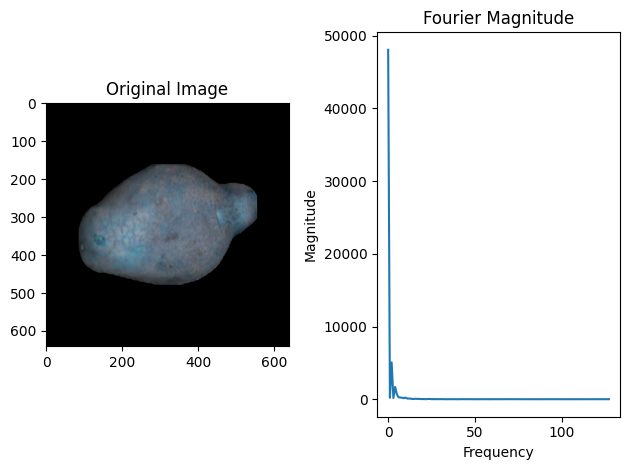

In [37]:
show_images_and_dft(img_path, check)

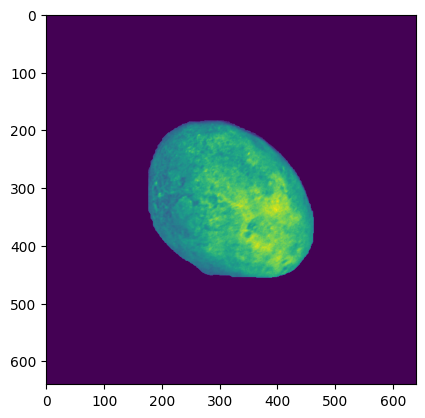

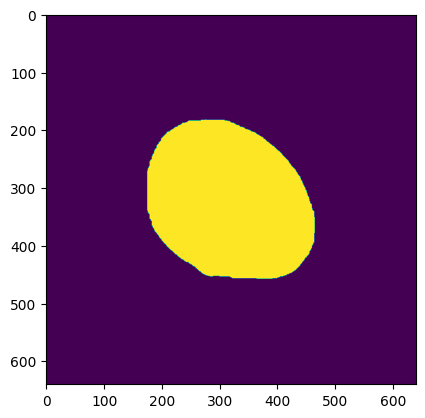

In [38]:
img_path = "/home/mishkat/Downloads/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_2_class/good/Afra_12_2_1_100_0.png"
check = process_image_and_calculate_dft(img_path)

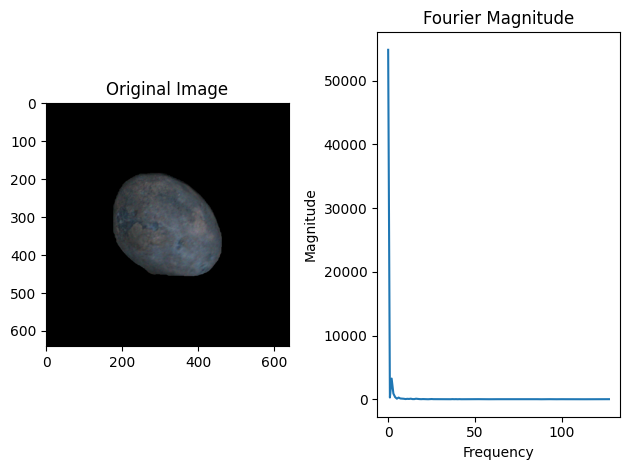

In [39]:
show_images_and_dft(img_path, check)    

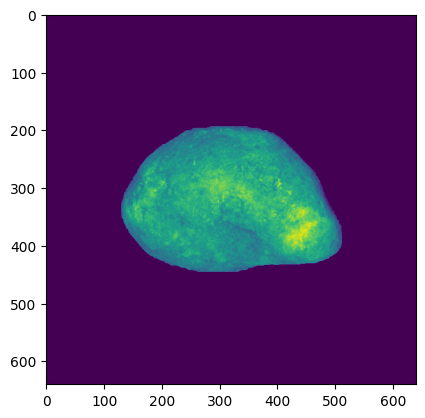

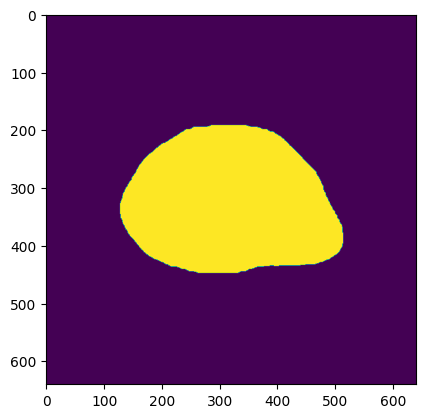

In [40]:
img_path = "/home/mishkat/Downloads/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_2_class/good/Afra_12_2_1_130_11.png"
check = process_image_and_calculate_dft(img_path)

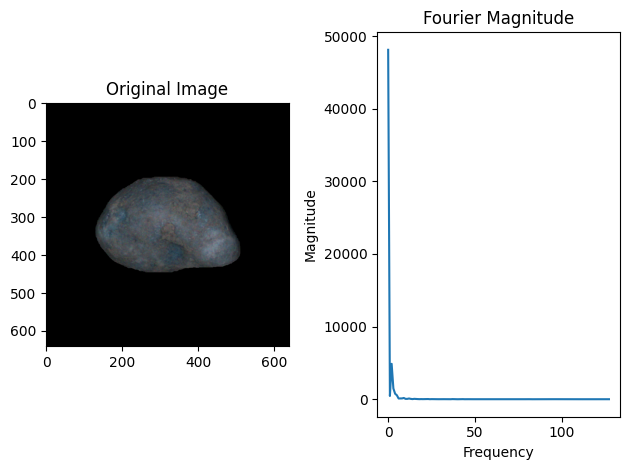

In [41]:
show_images_and_dft(img_path, check)    

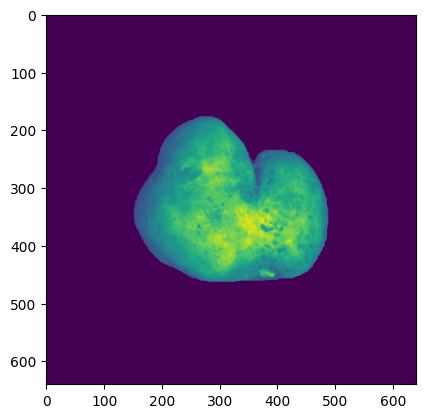

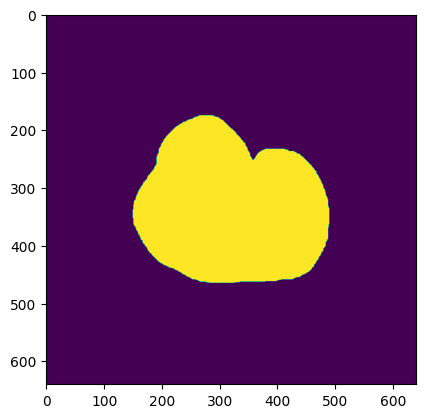

In [42]:
img_path = "/home/mishkat/Downloads/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_3_class/ugly/sd_malformed_12_2_1_102_0.png"
check = process_image_and_calculate_dft(img_path)

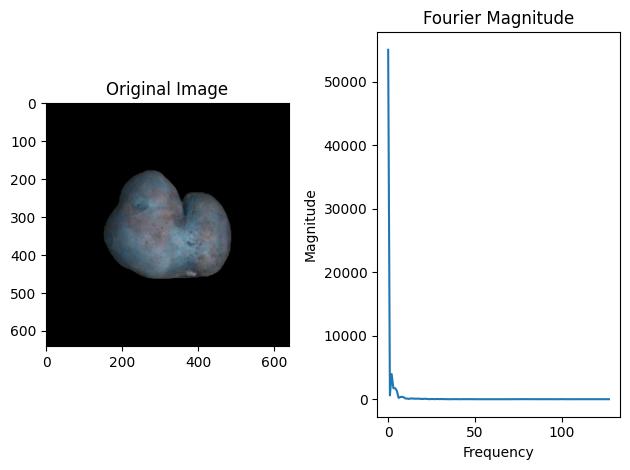

In [43]:
show_images_and_dft(img_path, check)    

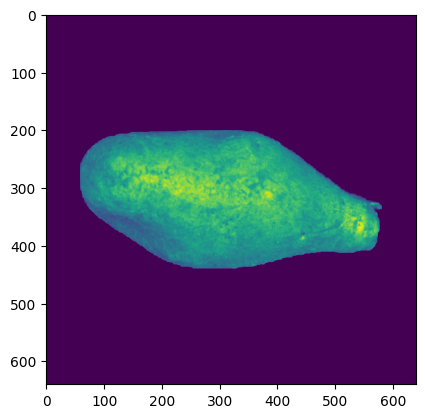

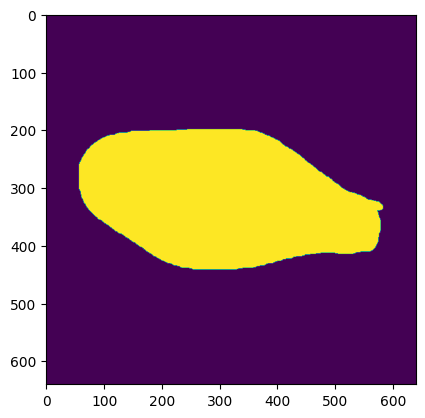

In [44]:
img_path = "/home/mishkat/Downloads/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_3_class/ugly/sd_malformed_12_2_1_116_18.png"
check = process_image_and_calculate_dft(img_path)   

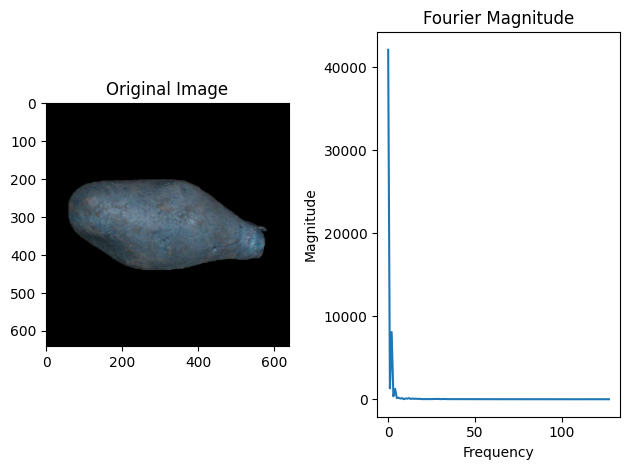

In [45]:
show_images_and_dft(img_path, check)    